In [6]:
#pip install cupy-cuda12x

  Using cached fastrlock-0.8.3-cp312-cp312-win_amd64.whl.metadata (7.9 kB)
   ---------------------------------------- 0.0/82.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/82.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/82.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/82.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/82.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/82.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/82.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/82.1 MB 419.4 kB/s eta 0:03:15
   ---------------------------------------- 0.5/82.1 MB 419.4 kB/s eta 0:03:15
   ---------------------------------------- 0.5/82.1 MB 419.4 kB/s eta 0:03:15
   ---------------------------------------- 0.8/82.1 MB 404.2 kB/s eta 0:03:22
   ---------------------------------------- 0.8/82.1 MB 404.2 kB/s eta 0:03:22
    ------------------------------------

In [10]:
# import cupy as cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

In [11]:
# import cupy as c
# print(cp.cuda.runtime.runtimeGetVersion())

12080


### **NO NVIDIA GPUS**

In [13]:
# x1_gpu = cp.random.uniform(0, 2.0, n).astype(cp.float32)
# x2_gpu = cp.random.uniform(0, 2.0, n).astype(cp.float32)

# y_gpu = cp.around((x1_gpu * w1 + x2_gpu * w2 + b), decimals=2)

CUDARuntimeError: cudaErrorInsufficientDriver: CUDA driver version is insufficient for CUDA runtime version

In [ ]:
# df = pd.DataFrame({'x': x1, 'y': x2, 'result': y})
# df.to_csv("linear_regression_dataset.csv", index=False)

In [ ]:
# # Create meshgrid
# x_vals = np.linspace(df["x"].min(), df["x"].max(), 50)
# y_vals = np.linspace(df["y"].min(), df["y"].max(), 50)
# X, Y = np.meshgrid(x_vals, y_vals)

In [ ]:
# # Interpolate onto grid
# Z = griddata((df["x"], df["y"]), df["result"], (X, Y), method='linear')

In [1]:
# fig = plt.figure(figsize=(10, 8), dpi=120)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')

# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('result')
# ax.set_title('3D Surface Plot of result = f(x, y)')
# plt.tight_layout()
# plt.show()

NameError: name 'plt' is not defined

In [3]:
with open("linear_regression_dataset.csv", "w") as file:
    file.close()
for i in range(20):
    for j in range(20):
        x1 = i/10
        x2 = j/10
        y = round(x1*w1 + x2*w2 + b,2)
        with open("linear_regression_dataset.csv", "a") as file:
            file.write(f"{x1},{x2},{y}\n")

In [4]:
df = pd.read_csv("linear_regression_dataset.csv",names = ['x', 'y', 'result'])
df.head()

,x,y,result
0,0.0,0.0,0.40
1,0.0,0.1,0.42
2,0.0,0.2,0.44
3,0.0,0.3,0.46
4,0.0,0.4,0.48


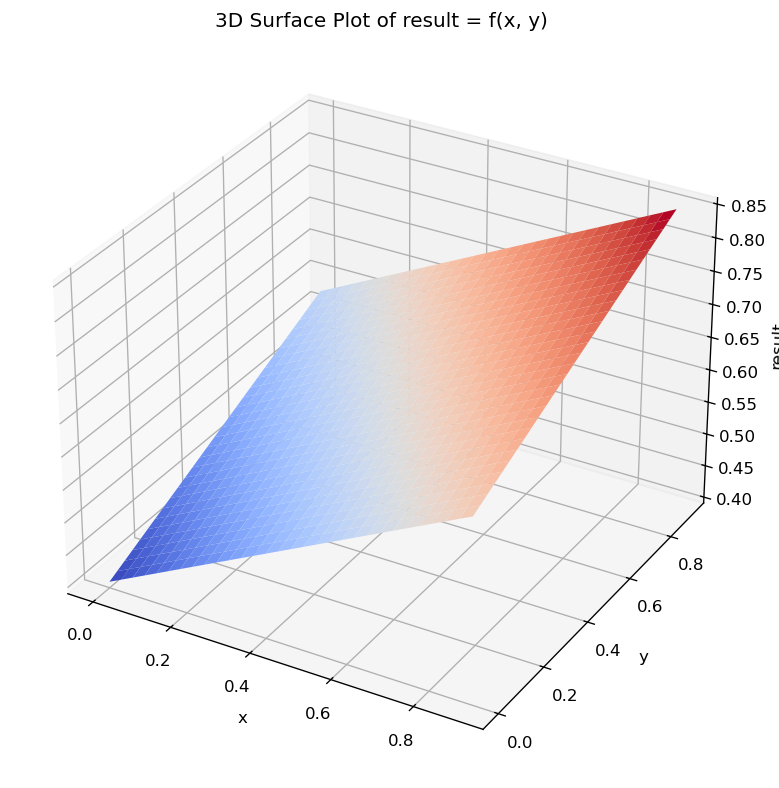

In [5]:
# Create meshgrid from 'x' and 'y'
x_vals = np.linspace(df["x"].min(), df["x"].max(), 30)
y_vals = np.linspace(df["y"].min(), df["y"].max(), 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Interpolate 'result' values onto the meshgrid
Z = griddata((df["x"], df["y"]), df["result"], (X, Y), method='linear')

# Plotting
fig = plt.figure(figsize=(10, 8), dpi=120)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('result')
ax.set_title('3D Surface Plot of result = f(x, y)')
plt.show()